## Part A: IMDb Movie Review Sentiment Analysis

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tabulate import tabulate
from wordcloud import WordCloud

### 1. Data Exploration and Preprocessing

In [ ]:
# Load Dataset
#from google.colab import drive
#drive.mount('/content/drive')
file_path = '/content/drive/My Drive/PGC/imdb_data.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# check for missing values
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


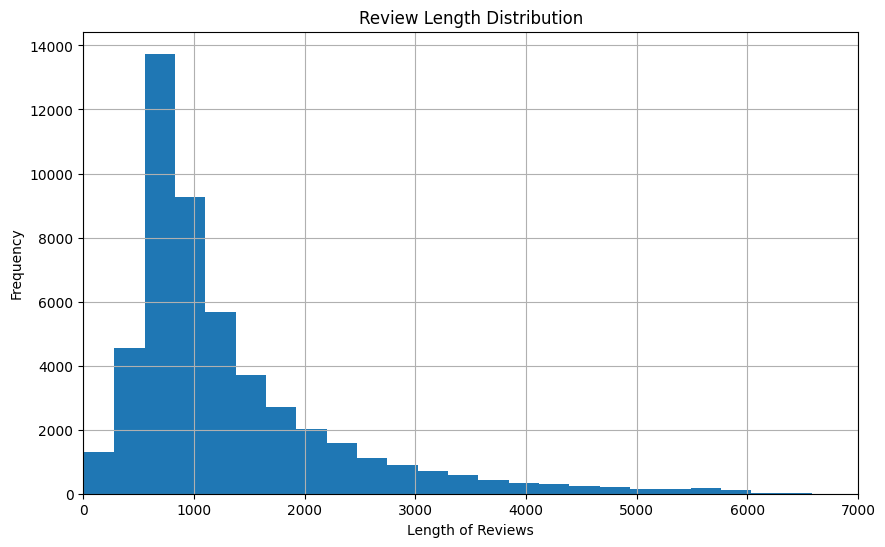

In [ ]:
# Review Length Distribution
data['review_length'] = data['review'].apply(len)
data['review_length'].hist(bins=50, figsize=(10, 6))
plt.title('Review Length Distribution')
plt.xlabel('Length of Reviews')
plt.ylabel('Frequency')
plt.xlim(0,7000)
plt.show()


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(word) for word in tokens]
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Return the preprocessed text
    return ' '.join(tokens)

In [ ]:
 data['cleaned_review'] = data['review'].apply(preprocess_text)

In [ ]:
data['cleaned_review'].head(10)

,cleaned_review
0,one reviewer mentioned watching oz episode you...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...
5,probably alltime favorite movie story selfless...
6,sure would like see resurrection dated seahunt...
7,show amazing fresh innovative idea first aired...
8,encouraged positive comment film looking forwa...
9,like original gut wrenching laughter like movi...


In [ ]:
data['sentiment']= data['sentiment'].map({'positive':1,'negative':0})

In [ ]:
data['sentiment'].head()

,sentiment
0,1
1,1
2,1
3,0
4,1


### 2. Feature Engineering





### 3. Model Development


### 4. Model Evaluation

In [ ]:
# define X and y
# Splitting the data into training and testing sets
X = data['cleaned_review']
y = data['sentiment']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Model training and evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    return acc, confusion_matrix(y_test, y_pred)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    acc, cm = evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test, name)
    results[name] = (acc, cm)

Logistic Regression Accuracy: 0.8871

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Naive Bayes Accuracy: 0.8525

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Support Vector Machine Accuracy: 0.8855

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88

In [ ]:
# Neural Networks
# Tokenization for neural networks
max_features = 5000
max_len = 200
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# Simple Feedforward Neural Network
ffnn = Sequential([
    Embedding(max_features, embedding_dim, input_length=max_len),
    SpatialDropout1D(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),  # Add global pooling
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ffnn.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

ffnn_loss, ffnn_acc = ffnn.evaluate(X_test_pad, y_test, verbose=0)
print(f"Feedforward Neural Network Accuracy: {ffnn_acc:.4f}")


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6617 - loss: 0.5919 - val_accuracy: 0.8194 - val_loss: 0.3822
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8662 - loss: 0.3132 - val_accuracy: 0.8701 - val_loss: 0.3019
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8793 - loss: 0.2871 - val_accuracy: 0.8829 - val_loss: 0.2806
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8985 - loss: 0.2528 - val_accuracy: 0.8784 - val_loss: 0.2910
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9065 - loss: 0.2356 - val_accuracy: 0.8616 - val_loss: 0.3301
Feedforward Neural Network Accuracy: 0.8538


In [ ]:
# LSTM Neural Network
lstm = Sequential([
    Embedding(max_features, embedding_dim, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

lstm_loss, lstm_acc = lstm.evaluate(X_test_pad, y_test, verbose=0)
print(f"LSTM Neural Network Accuracy: {lstm_acc:.4f}")

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 261s 514ms/step - accuracy: 0.7304 - loss: 0.5212 - val_accuracy: 0.8595 - val_loss: 0.3422
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 256s 502ms/step - accuracy: 0.8638 - loss: 0.3291 - val_accuracy: 0.8461 - val_loss: 0.3762
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 258s 494ms/step - accuracy: 0.8841 - loss: 0.2962 - val_accuracy: 0.8679 - val_loss: 0.3245
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 247s 494ms/step - accuracy: 0.8983 - loss: 0.2643 - val_accuracy: 0.8629 - val_loss: 0.3307
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 264s 498ms/step - accuracy: 0.9101 - loss: 0.2299 - val_accuracy: 0.8635 - val_loss: 0.3410
LSTM Neural Network Accuracy: 0.8675


In [ ]:
# Adding NN results to the summary
results['Feedforward Neural Network'] = (ffnn_acc, None)
results['LSTM Neural Network'] = (lstm_acc, None)

In [ ]:
# Visualize model performance
headers = ["Model", "Accuracy"]
rows = [(name, f"{acc:.4f}") for name, (acc, _) in results.items()]
print(tabulate(rows, headers=headers, tablefmt="grid"))

+----------------------------+------------+
| Model                      |   Accuracy |
+============================+============+
| Logistic Regression        |     0.8871 |
+----------------------------+------------+
| Naive Bayes                |     0.8525 |
+----------------------------+------------+
| Support Vector Machine     |     0.8855 |
+----------------------------+------------+
| Random Forest              |     0.8464 |
+----------------------------+------------+
| Feedforward Neural Network |     0.8538 |
+----------------------------+------------+
| LSTM Neural Network        |     0.8675 |
+----------------------------+------------+


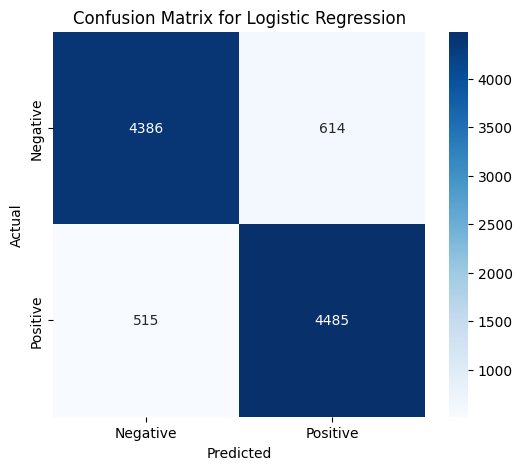

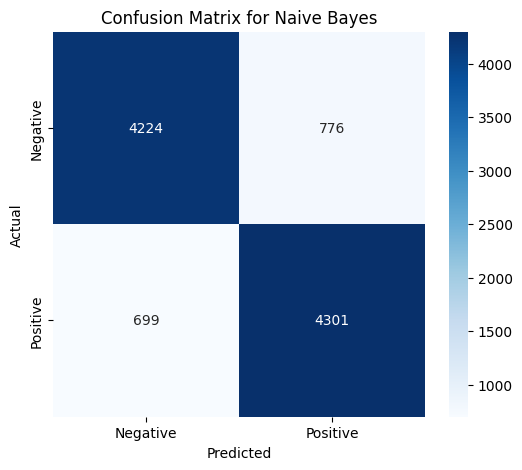

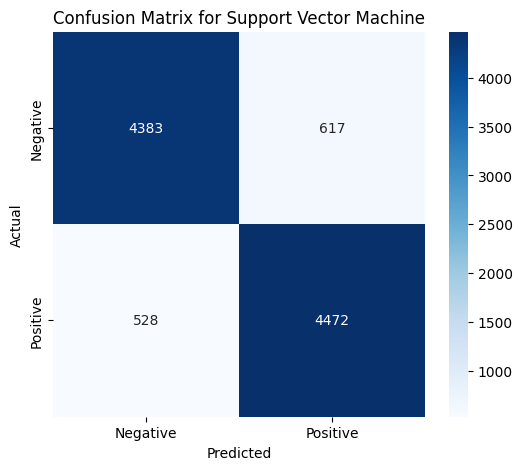

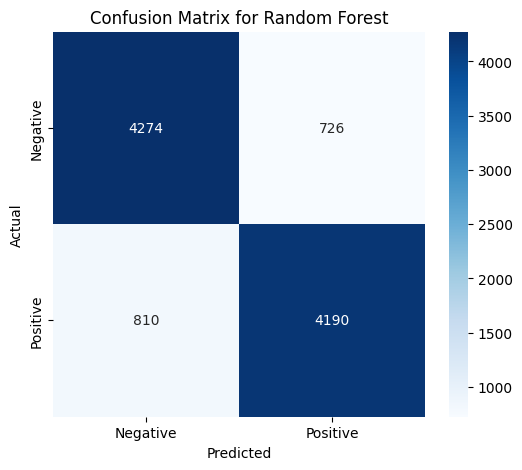

In [ ]:
# Confusion matrix visualization for classical ML models
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

for name, (_, cm) in results.items():
    if cm is not None:  # Skip confusion matrix for neural networks
        plot_confusion_matrix(cm, name)

In [1]:
# Summary
print("Models evaluated and results summarized.")


Models evaluated and results summarized.
